In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
from sklearn.linear_model import LinearRegression 

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [6]:
df.shape

(847, 2)

In [10]:
print(f"Data range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Data range of gold prices available from - 1950-01 to 2020-07


In [11]:
date = pd.date_range(start = '1/1/1950', end= '8/1/2020',freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [13]:
df['months'] = date 
df.drop('Date', axis =1, inplace =True )
df = df.set_index('months')
df.head()

,Price
months,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


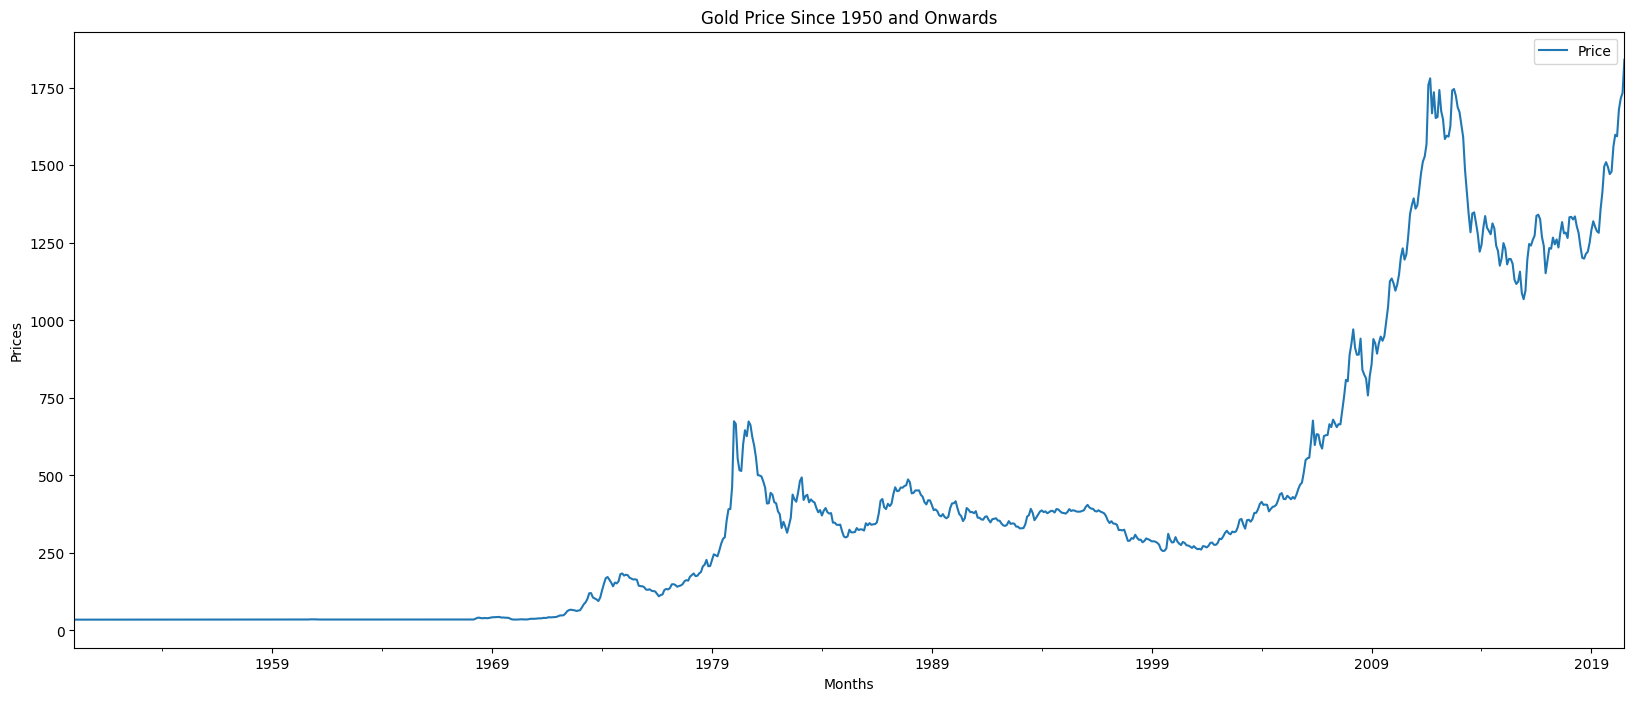

In [14]:
df.plot(figsize=(20,8))
plt.title('Gold Price Since 1950 and Onwards')
plt.xlabel("Months")
plt.ylabel('Prices')
plt.show()

In [15]:
 round(df.describe(), 3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


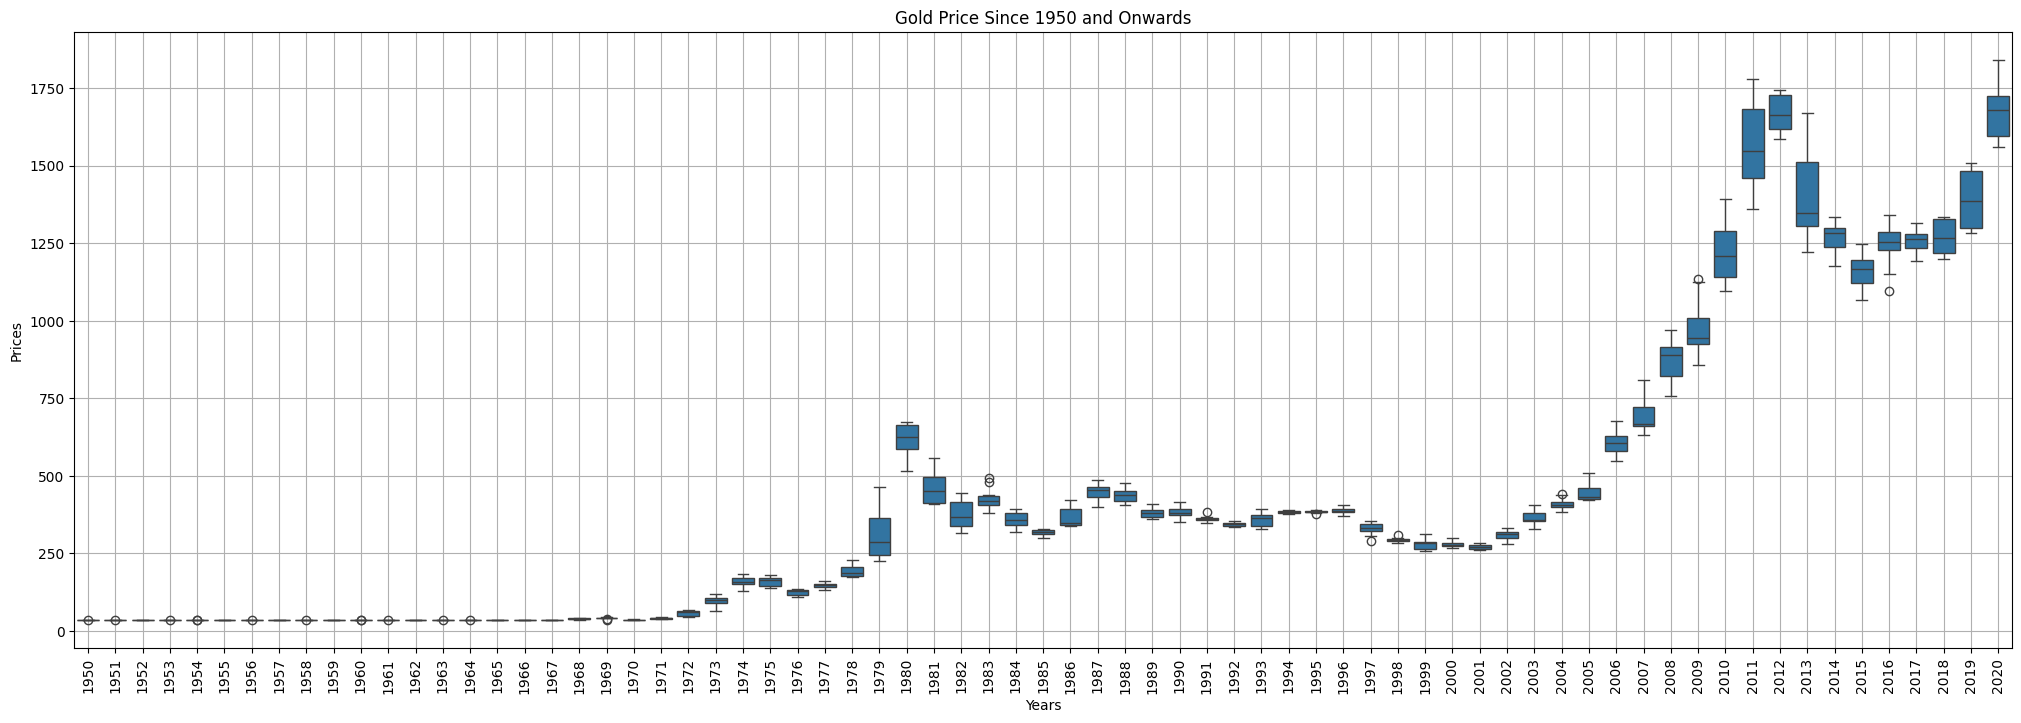

In [16]:
_, ax = plt.subplots(figsize=(25, 8 ))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax)
plt.title('Gold Price Since 1950 and Onwards')
plt.xlabel("Years")
plt.ylabel('Prices')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

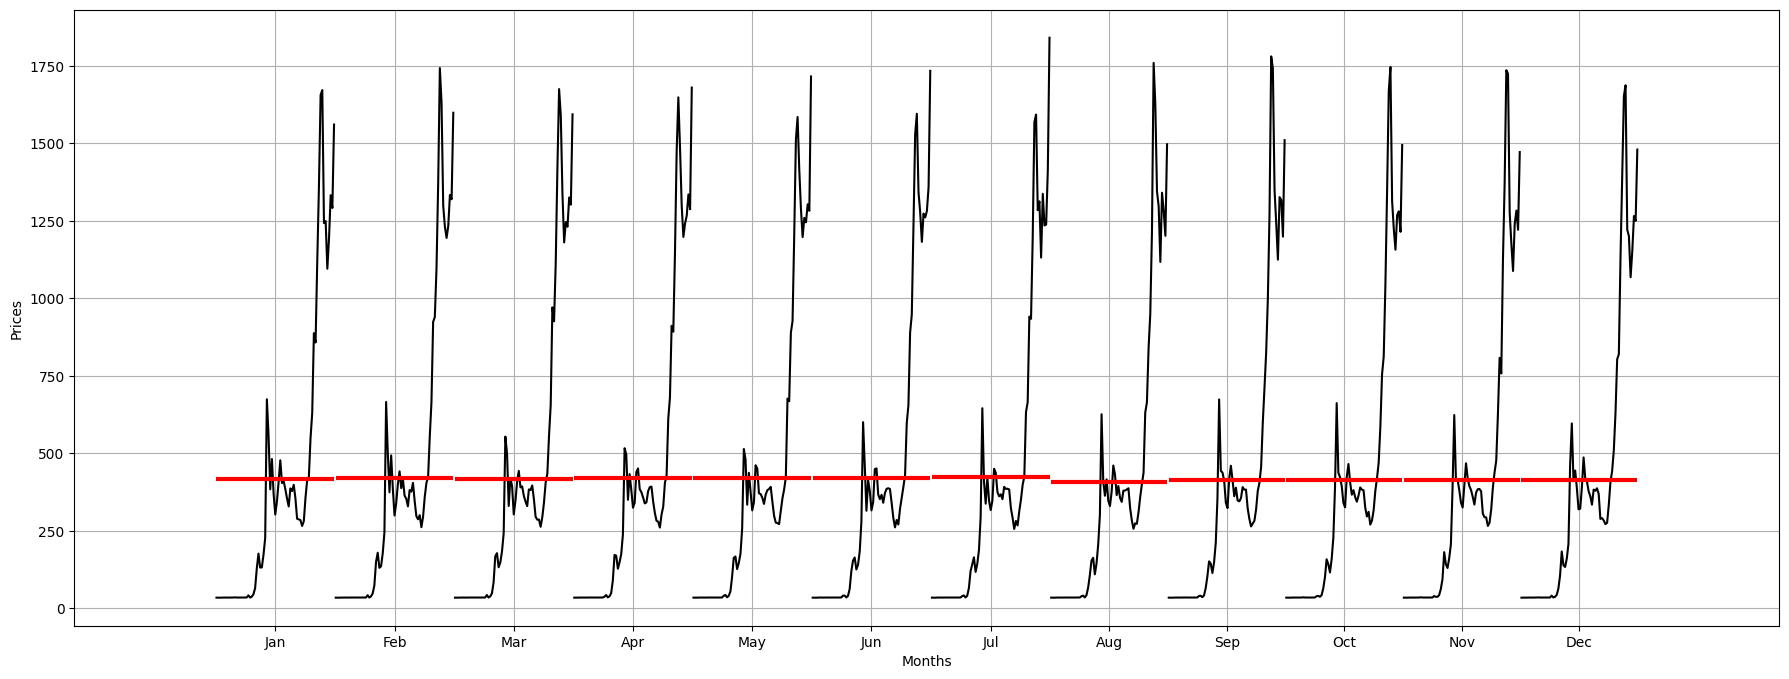

In [68]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22, 8))
month_plot(df, ylabel = 'Gold Price', ax= ax)
plt.xlabel("Months")
plt.ylabel('Prices')
plt.grid()

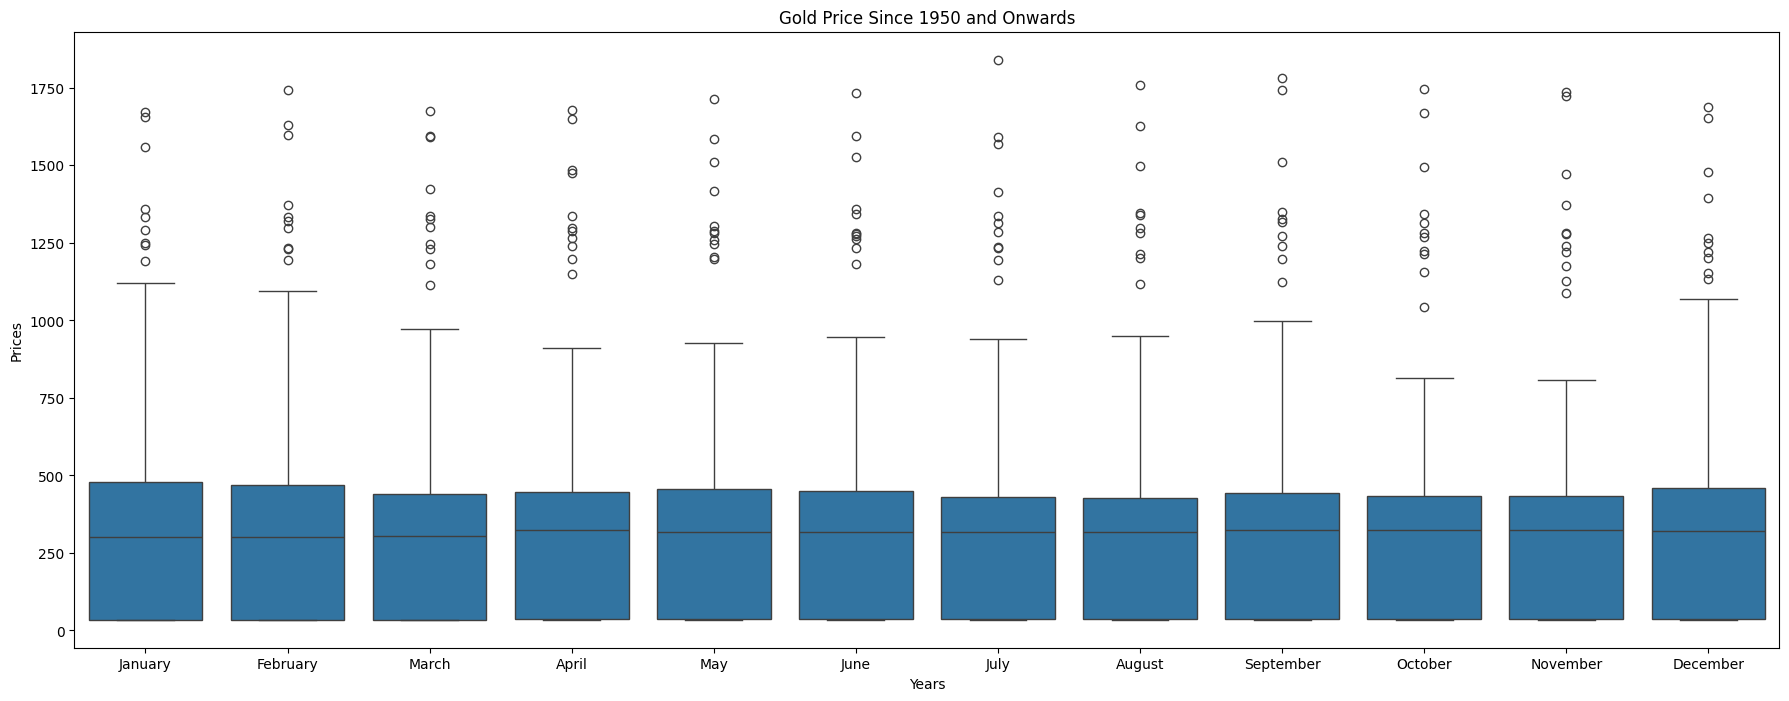

In [20]:
_, ax = plt.subplots(figsize=(22, 8 ))
sns.boxplot(x = df.index.month_name() , y = df.values[:, 0], ax=ax)
plt.title('Gold Price Since 1950 and Onwards')
plt.xlabel("Years")
plt.ylabel('Prices')
plt.show()

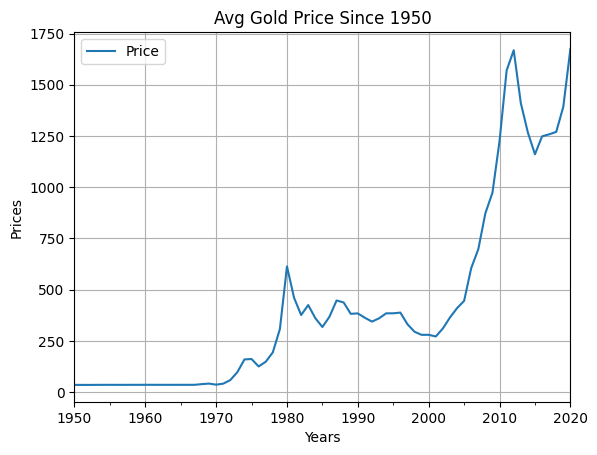

In [25]:
df_yearlly_sum = df.resample('A').mean()
df_yearlly_sum.plot();
plt.xlabel("Years")
plt.ylabel('Prices')
plt.title('Avg Gold Price Since 1950')
plt.grid()
plt.show()

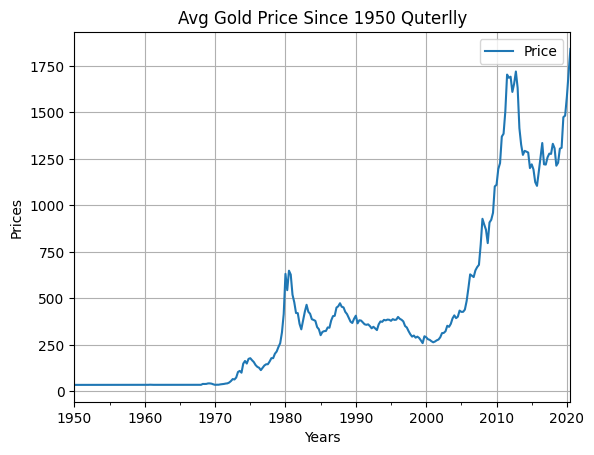

In [26]:
df_yearlly_sum = df.resample('Q').mean()
df_yearlly_sum.plot();
plt.xlabel("Years")
plt.ylabel('Prices')
plt.title('Avg Gold Price Since 1950 Quterlly')
plt.grid()
plt.show()

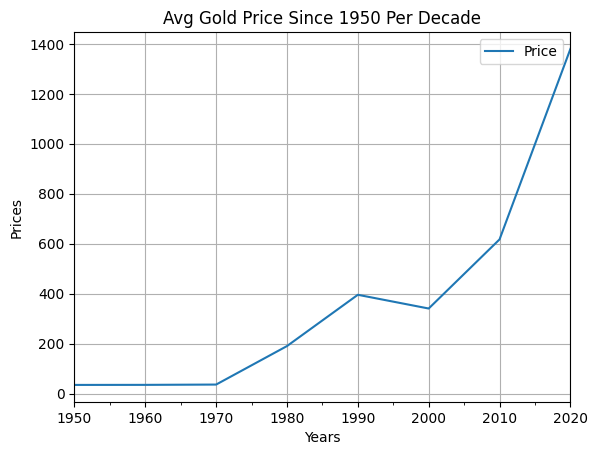

In [27]:
df_yearlly_sum = df.resample('10Y').mean()
df_yearlly_sum.plot();
plt.xlabel("Years")
plt.ylabel('Prices')
plt.title('Avg Gold Price Since 1950 Per Decade')
plt.grid()
plt.show()

In [29]:
# Finding the coeficient of deviation and standard daviation 
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price': 'Std'}), left_index = True, right_index = True)
df_1['Cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
months,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


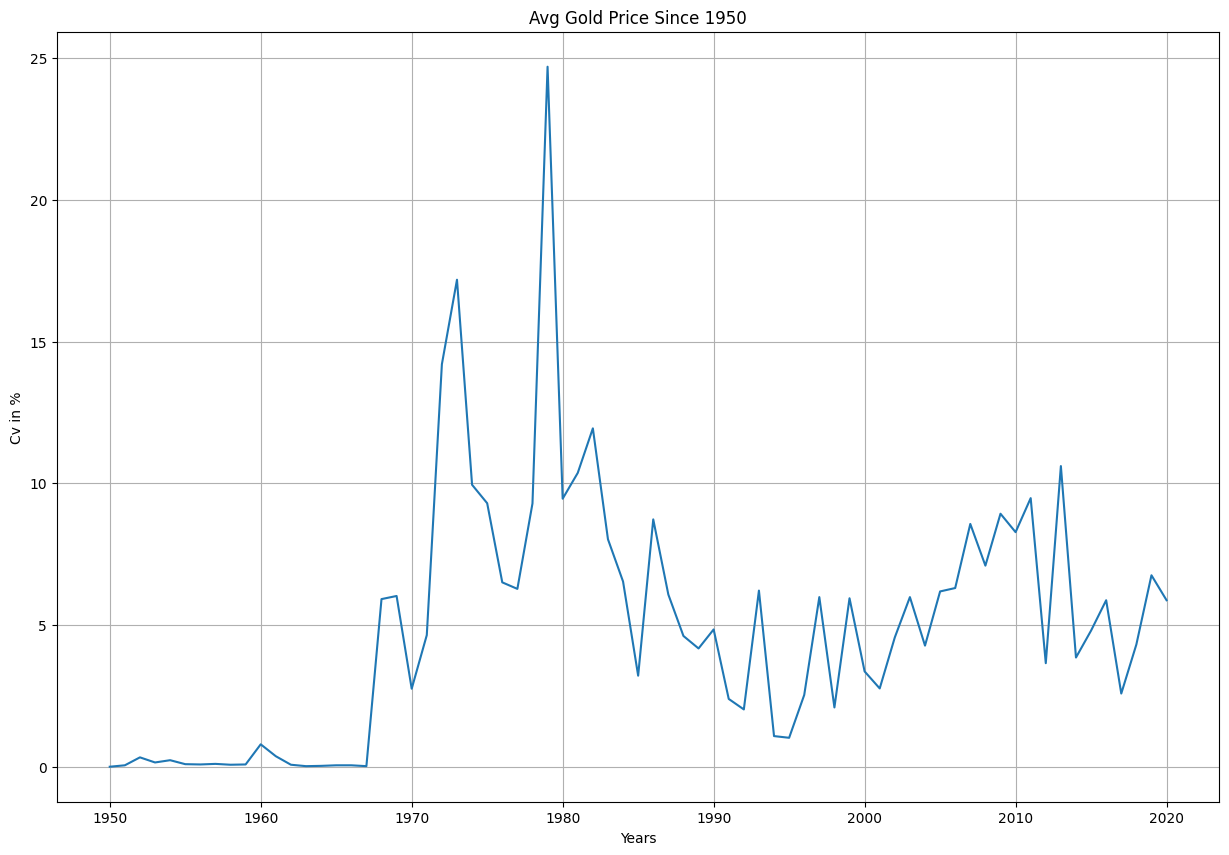

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot();
plt.xlabel("Years")
plt.ylabel('Cv in %')
plt.title('Avg Gold Price Since 1950')
plt.grid()
plt.show()

In [31]:
train = df[df.index.year <= 2015]
test  = df[df.index.year > 2015]

In [32]:
print(train)
print(test)

               Price
months              
1950-01-31    34.730
1950-02-28    34.730
1950-03-31    34.730
1950-04-30    34.730
1950-05-31    34.730
...              ...
2015-08-31  1117.525
2015-09-30  1124.905
2015-10-31  1157.123
2015-11-30  1088.388
2015-12-31  1068.317

[792 rows x 1 columns]
               Price
months              
2016-01-31  1095.655
2016-02-29  1194.893
2016-03-31  1246.312
2016-04-30  1241.452
2016-05-31  1259.755
2016-06-30  1273.580
2016-07-31  1337.429
2016-08-31  1340.861
2016-09-30  1326.618
2016-10-31  1268.929
2016-11-30  1240.293
2016-12-31  1152.165
2017-01-31  1192.648
2017-02-28  1233.390
2017-03-31  1231.063
2017-04-30  1267.150
2017-05-31  1245.250
2017-06-30  1261.277
2017-07-31  1235.100
2017-08-31  1281.720
2017-09-30  1317.045
2017-10-31  1280.677
2017-11-30  1283.189
2017-12-31  1265.674
2018-01-31  1332.809
2018-02-28  1333.775
2018-03-31  1325.562
2018-04-30  1335.332
2018-05-31  1303.618
2018-06-30  1282.126
2018-07-31  1238.064
2018-08-31

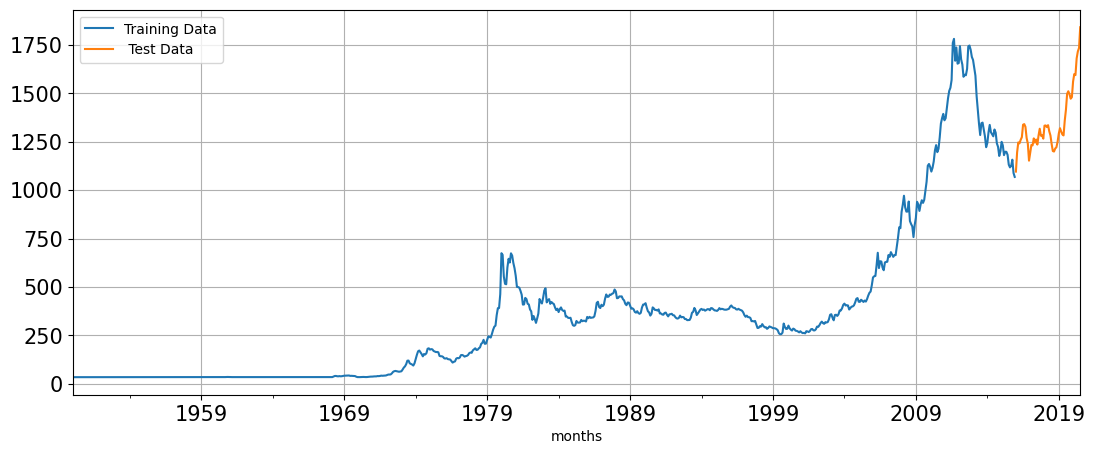

In [34]:
train["Price"].plot(figsize =(13,5), fontsize= 15)
test["Price"].plot(figsize =(13,5), fontsize= 15)
plt.grid()
plt.legend(['Training Data', ' Test Data'])
plt.show()

In [35]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [38]:
LR_trian = train.copy()
LR_test = test.copy()

In [39]:
LR_trian['time'] = train_time
LR_test['time'] = test_time

In [41]:
lr = LinearRegression()
lr.fit(LR_trian[['time']], LR_trian['Price'].values)

LinearRegression()

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

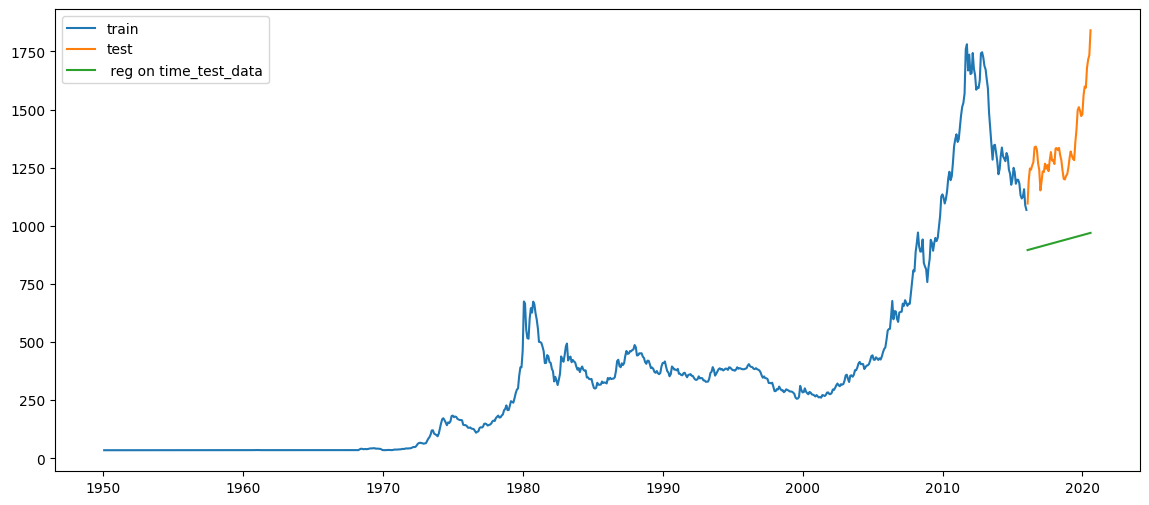

In [49]:
test_predictions_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize =(14, 6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['forecast'], label = ' reg on time_test_data')
plt.legend(loc = 'best')
plt.grid

In [50]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/actual))*100, 2)

In [53]:
mape_model1_test = mape(test['Price'].values,test_predictions_model1)
print("MAPE is %3.3f" %(mape_model1_test), "%")

MAPE is 29.760 %


In [55]:
result = pd.DataFrame({'Test Mape (%) ': [mape_model1_test]}, index=["RegressionOnTime"])
result

,Test Mape (%)
RegressionOnTime,29.76


In [57]:
final_model = ExponentialSmoothing(df,
                                   trend = 'additive',
                                   seasonal = 'additive').fit(smoothing_level = 0.4,
                                                             smoothing_trend = 0.3,
                                                             smoothing_seasonal = 0.6)
                                   

In [59]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print('Mape : ', Mape_final_model)

Mape :  17.24


In [61]:
predictions = final_model.forecast(steps=len(test))

In [66]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid,ddof=1),
                       'prediction': predictions,
                       'upper_CI': predictions+ 1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


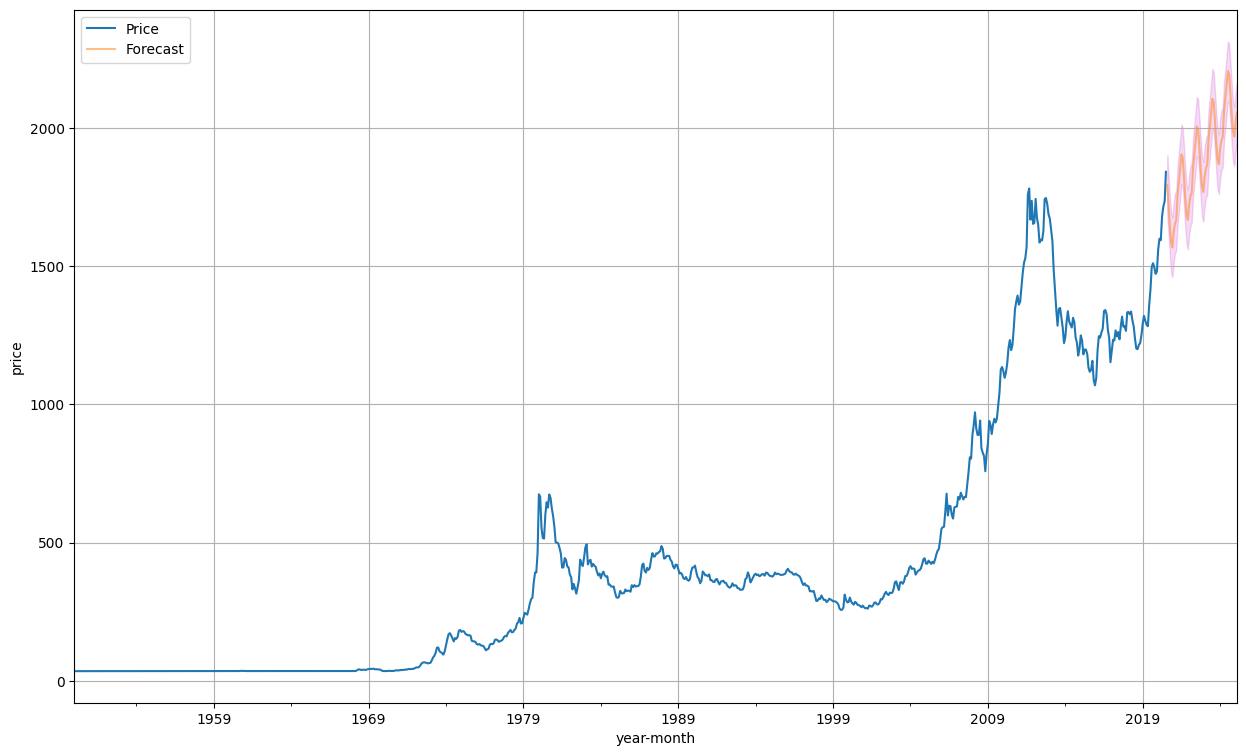

In [67]:
 axis = df.plot(label = "Actual", figsize=(15,9))
pred_df['prediction'].plot(ax = axis, label = 'Forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color ='m', alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show()